In [23]:
import os
import xarray as xr
import pandas as pd
import numpy as np
import sys
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt

In [24]:
#See description of experiments below
exp1 = 'lnic' 
exp2 = 'lric' 

In [25]:

def read_files(exp):   
    
    if exp=='5icu':
        expname = 'Surface/standard FW distribution + IMAU UU + gamma = 0.08'
    elif exp=='lcif':
        expname = 'New FW distribution + no latent heat correction + IMAU UU + gamma = 0.08*0.65'  
    elif exp == 'lcic':
        expname = 'New FW distribution + IMAU UU + gamma = 0.08*0.065'
        #outputdir = f'/perm/nlcd/eve-classic/fwf/interactive/forcing_files/{exp}'
    elif exp == 'lcbc':
        expname = 'New FW distribution + BISICLES KNMI + gamma = 0.10'
    elif exp == 'lcsc':
        expname = 'New FW distribution + smoothed BISICLES KNMI + gamma = 0.10'
    elif exp == 'lnic':
        expname = 'New FW distribution + IMAU UU + gamma = 0.15'
    elif exp == 'lric':
        expname = 'New FW distribution + IMAU UU  + gamma = 0.10'
    else:
        print('Experiment name not defined')

    if exp=='5icu' or exp=='lcif' or exp=='lcic':
        ecedir = 'ecearth3-cmip6/runtime/classic/'
        year_min=1850
        year_max=2100
    elif exp=='lcbc':
        ecedir = 'r9412-cmip6-lrf-knmi/runtime/classic/'
        year_min=1850
        year_max=2101
    elif exp=='lric' or exp=='lnic' or exp=='lcsc':
        ecedir = f'r9412-cmip6-lrf-knmi/runtime/classic-{exp}/'
        year_min=1850
        year_max=2101
    

    print(year_min,year_max)
    outputdir = f'/perm/nk0j/{ecedir}/fwf/interactive/forcing_files/{exp}'
    freshwater_forcing_file = f'{outputdir}/TotalFreshwaterForcing_{exp}_{year_min}_{year_max}.csv'
    basal_melt_anomaly_file = f'{outputdir}/BasalMeltAnomaly_{exp}_{year_min}_{year_max}.csv'
    freshwater_forcing_anomaly_file = f'{outputdir}/FreshwaterForcingAnomaly_{exp}_{year_min}_{year_max}.csv'
    #cumulative_freshwater_forcing_anomaly_file = f'{outputdir}/CumulativeFreshwaterForcingAnomaly_{exp}_Future.csv'  
    thetao_file = f'{outputdir}/OceanSectorThetao_{exp}_{year_min}_{year_max}.csv'
    #thetao_30yRM_file = f'{outputdir}/OceanSectorThetao_30yRM_{exp}_{year_min}_{year_max}.csv'

    df_fwf = pd.read_csv(freshwater_forcing_file)
    df_fwf = df_fwf.set_index('year')
    df_fwf = df_fwf.rename(columns={'0':expname})
    df_fwf = df_fwf -df_fwf.loc[1850] #only show anomalous forcing


    df_thetao = pd.read_csv(thetao_file)
    #df_thetao_30yRM = pd.read_csv(thetao_30yRM_file)
    df_bm_anom = pd.read_csv(basal_melt_anomaly_file)
    df_fwf_anom = pd.read_csv(freshwater_forcing_anomaly_file)
    #df_cum_fwf_anom = pd.read_csv(cumulative_freshwater_forcing_anomaly_file)

    return(df_fwf, df_thetao, df_bm_anom, df_fwf_anom)



In [26]:
df_fwf_exp1, df_thetao_exp1, df_bm_anom_exp1, df_fwf_anom_exp1 = read_files(exp1)
df_fwf_exp2, df_thetao_exp2, df_bm_anom_exp2, df_fwf_anom_exp2 = read_files(exp2)

1850 2101
1850 2101


In [27]:
plt.rcParams["figure.figsize"] = [7.00, 4.50]
plt.rcParams["figure.autolayout"] = True


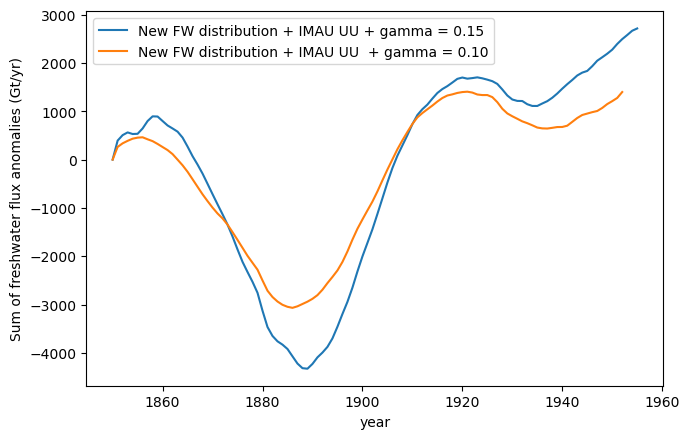

In [28]:

ax = df_fwf_exp1.plot.line(ylabel='Sum of freshwater flux anomalies (Gt/yr)')
df_fwf_exp2.plot.line(ax=ax)


plt.show()




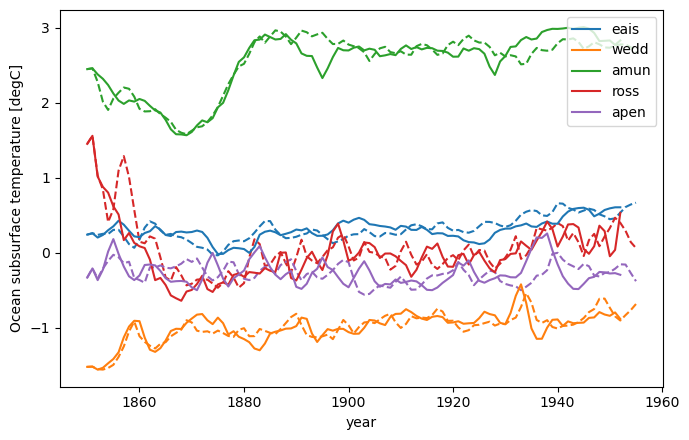

In [29]:
ax = df_thetao_exp1.plot.line(x='year',y=['eais','wedd','amun','ross','apen'], color = ['C0','C1','C2','C3','C4'], ls = '--', ylabel='Ocean subsurface temperature [degC]', legend=None)
df_thetao_exp2.plot.line(ax=ax,x='year',y=['eais','wedd','amun','ross','apen'], color = ['C0','C1','C2','C3','C4'])

plt.show()




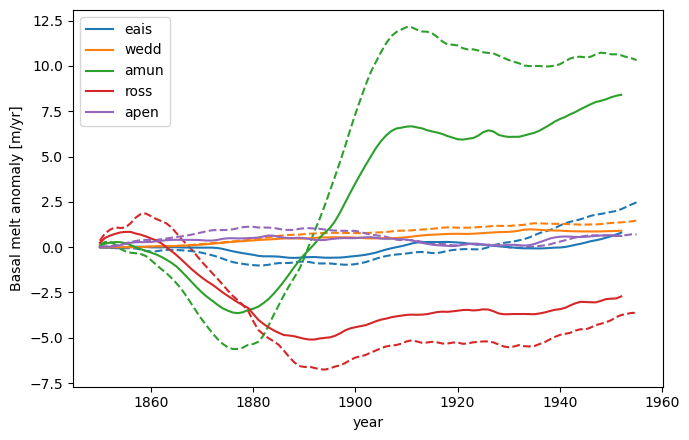

In [30]:
ax = df_bm_anom_exp1.plot.line(x='year',y=['eais','wedd','amun','ross','apen'], color = ['C0','C1','C2','C3','C4'], ls = '--', ylabel='Basal melt anomaly [m/yr]', legend=None)
df_bm_anom_exp2.plot.line(ax=ax,x='year',y=['eais','wedd','amun','ross','apen'], color = ['C0','C1','C2','C3','C4'])

plt.show()




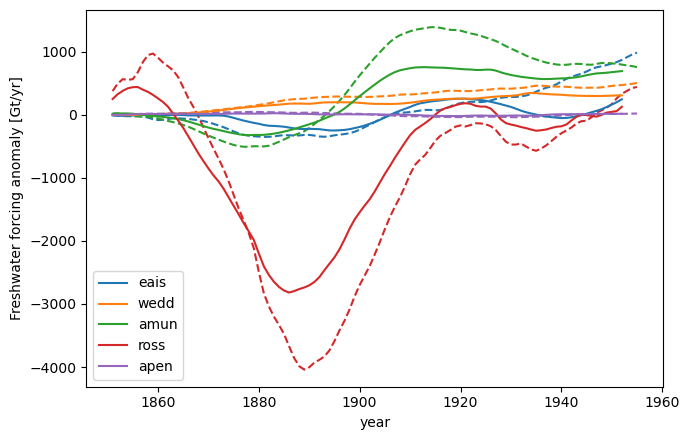

In [31]:
ax = df_fwf_anom_exp1.plot.line(x='year',y=['eais','wedd','amun','ross','apen'], color = ['C0','C1','C2','C3','C4'], ls = '--', ylabel='Freshwater forcing anomaly [Gt/yr]', legend=None)
df_fwf_anom_exp2.plot.line(ax=ax,x='year',y=['eais','wedd','amun','ross','apen'], color = ['C0','C1','C2','C3','C4'])

plt.show()


